In [111]:
import pandas as pd
from pathlib import Path
import re

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Read keypoint dataframe

In [114]:
csv_file = "data/output/keypoints_041122-20-37-58.csv"
df = pd.read_csv(csv_file)
len(df)

1805

In [115]:
def get_keypoint_coordinates(index, location):
    """This function obtains keypoints recorded for a specific location at a 
    specific time (defined by the index)

        Args:
            inputs (dict): Dictionary with keys 
                "img", "bboxes", "bbox_scores", "keypoints", "keypoint_scores".

        Returns:
            keypoint_coordinates (np.array): x and y coordinates for the point.
    """
    keypoints = [
        list(
            map(
                float,
                re.sub(r"\s+", " ", keypoint.strip()[1:-1]).strip().split(" "),
            )
        )
        for keypoint in df.iloc[index]["keypoints"][2:-2].split("\n ")
    ]
    return np.array([keypoints])[0][location, :]
    
    

<img src="figures/keypoint_IDs.png" width="350">


In [116]:
L_ANKLE = 15
R_ANKLE = 16

In [117]:
df['l_ankle_x'] = [get_keypoint_coordinates(x, L_ANKLE)[0] for x in range(len(df))]
df['l_ankle_y'] = [get_keypoint_coordinates(x, L_ANKLE)[1] for x in range(len(df))]
df['r_ankle_x'] = [get_keypoint_coordinates(x, R_ANKLE)[0] for x in range(len(df))]
df['r_ankle_y'] = [get_keypoint_coordinates(x, R_ANKLE)[1] for x in range(len(df))]

In [118]:
df

,Time,keypoints,stride,l_ankle_x,l_ankle_y,r_ankle_x,r_ankle_y
0,20:38:19,[[[ 0.81024386 0. ]\n [-1. -1...,0.042316,0.565262,0.777548,0.522946,0.810128
1,20:38:19,[[[-1. -1. ]\n [-1. -1...,0.039857,0.563771,0.787932,0.523914,0.816744
2,20:38:19,[[[-1. -1. ]\n [-1. -1...,0.039857,0.550722,0.752536,0.518698,0.808185
3,20:38:19,[[[ 0.82748885 0. ]\n [-1. -1...,0.044650,0.562393,0.753105,0.517743,0.806261
4,20:38:19,[[[ 0.77515167 0. ]\n [-1. -1...,0.097901,0.587011,0.761229,0.489111,0.806258
...,...,...,...,...,...,...,...
1800,20:40:18,[[[-1.00000000e+00 -1.00000000e+00]\n [-1.000...,0.035848,-1.000000,-1.000000,-1.000000,-1.000000
1801,20:40:18,[[[-1. -1. ]\n [-1. -1...,0.035848,0.467268,0.743875,0.586083,0.745176
1802,20:40:18,[[[-1. -1. ]\n [-1. -1...,0.163314,0.455953,0.732002,0.619267,0.755185
1803,20:40:18,[[[ 0.72393158 0. ]\n [-1. -1...,0.157237,0.451792,0.707114,0.609029,0.766703


In [119]:
df

,Time,keypoints,stride,l_ankle_x,l_ankle_y,r_ankle_x,r_ankle_y
0,20:38:19,[[[ 0.81024386 0. ]\n [-1. -1...,0.042316,0.565262,0.777548,0.522946,0.810128
1,20:38:19,[[[-1. -1. ]\n [-1. -1...,0.039857,0.563771,0.787932,0.523914,0.816744
2,20:38:19,[[[-1. -1. ]\n [-1. -1...,0.039857,0.550722,0.752536,0.518698,0.808185
3,20:38:19,[[[ 0.82748885 0. ]\n [-1. -1...,0.044650,0.562393,0.753105,0.517743,0.806261
4,20:38:19,[[[ 0.77515167 0. ]\n [-1. -1...,0.097901,0.587011,0.761229,0.489111,0.806258
...,...,...,...,...,...,...,...
1800,20:40:18,[[[-1.00000000e+00 -1.00000000e+00]\n [-1.000...,0.035848,-1.000000,-1.000000,-1.000000,-1.000000
1801,20:40:18,[[[-1. -1. ]\n [-1. -1...,0.035848,0.467268,0.743875,0.586083,0.745176
1802,20:40:18,[[[-1. -1. ]\n [-1. -1...,0.163314,0.455953,0.732002,0.619267,0.755185
1803,20:40:18,[[[ 0.72393158 0. ]\n [-1. -1...,0.157237,0.451792,0.707114,0.609029,0.766703


<AxesSubplot: xlabel='Time'>

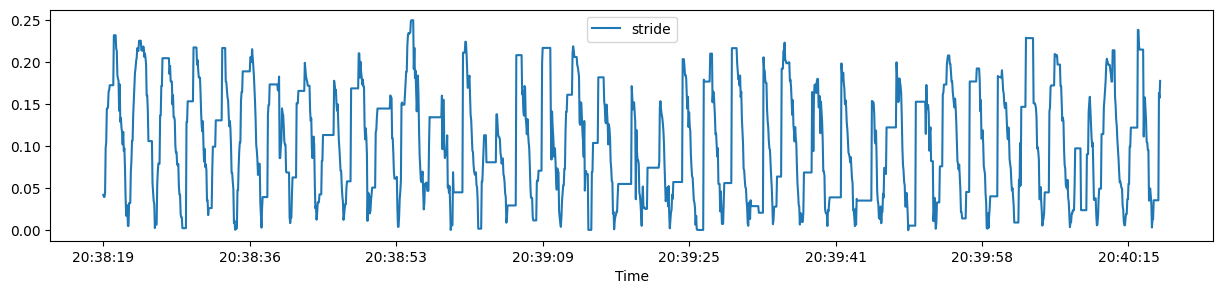

In [120]:
df.plot(x="Time", y="stride", figsize=(15,3))